In [5]:
import pandas as pd
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn import linear_model
from numpy import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
# y(dependent) = m(slope) x(independent) + c(intercept)
# SLR = slope line relationship
# linear regression: statistical tech where the score of a var Y is predicted from the score of the second var x
# interpolation: estimating a value with two known values from a list of values
# extrapolation: approximating a value by extending a known set of values
# pvalue: shows signifant variance of the data to draw conclusions b/n values of 0 - 1
    # if pvalue > 0.05 accept H0 (null hypothesis)
    # if pvalue <= 0.05 reject H0 (null hypothesis)
    # if pvalue = 0.05 marginal value, possible to go either way
    
# Steps involved in analytics:
    # 1. understanding the problem
    # 2. exploring data and getting familiarity
    # 3. preparing data
    # 4. build and run the model
    # 5. validate the model
    # 6. start implementing the model
    
# outliers: deviated values from the mean

# handling missing values: 

In [3]:
data = pd.read_csv('WeightWaist.csv')
data

,Waist_cm,Weight_kg
0,71,51
1,89,66
2,64,45
3,74,57
4,87,64
5,93,75
6,79,61
7,81,62
8,75,55
9,72,53


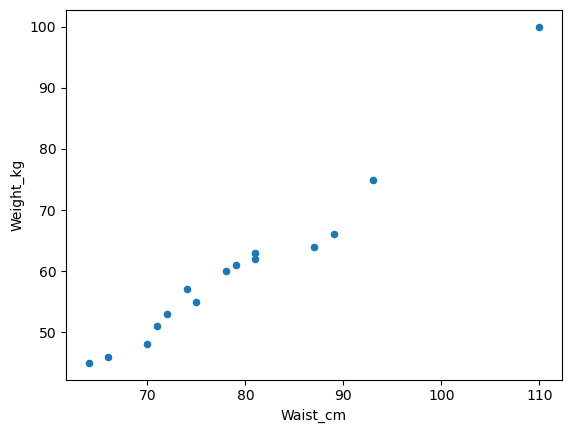

In [4]:
data.plot(kind='scatter',x='Waist_cm',y='Weight_kg')
plt.show()

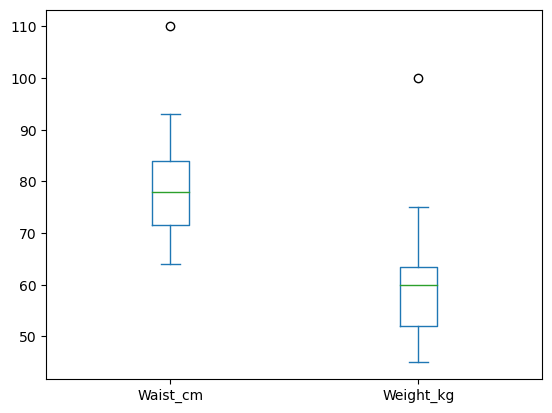

In [5]:
data.plot(kind='box')
plt.show()

In [6]:
# correlation coefficients
data.corr()

,Waist_cm,Weight_kg
Waist_cm,1.000000,0.981216
Weight_kg,0.981216,1.000000


In [7]:
# change to df var
Waist = pd.DataFrame(data['Waist_cm'])
Weight = pd.DataFrame(data['Weight_kg'])
print(Waist)
print('\n',Weight)

    Waist_cm
0         71
1         89
2         64
3         74
4         87
5         93
6         79
7         81
8         75
9         72
10        70
11        66
12        81
13        78
14       110

     Weight_kg
0          51
1          66
2          45
3          57
4          64
5          75
6          61
7          62
8          55
9          53
10         48
11         46
12         63
13         60
14        100


In [6]:
#  build a linear model
lm = linear_model.LinerRegression()
model = lm.fit(Waist,Weight)
model

AttributeError: module 'sklearn.linear_model' has no attribute 'LinerRegression'

In [ ]:
model.coef_

In [ ]:
model.intercept_

In [16]:
df = pd.read_csv('Advertising.csv')
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [17]:
df = pd.read_csv('50_Startups.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96
